## In our project, we are predicting wine quality based on a set of values for features by using the classification and the regression approaches!
Here, we used support vector machine supervised learning model with the classification and Regression techniques.

First we performed classifier algorithm and then Regressor algorithms for both White and Red wines respectively. 


## Step 1. Importing all the necessary packages and reading the data.

In [48]:
# importing the libaries

import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

### Reading the white and red wine data 

In [49]:
# Reading the input data from the external CSV

white_wine= pd.read_csv("/Users/revasmac/Desktop/Data245_ML/winequality-white.csv")
red_wine= pd.read_csv("/Users/revasmac/Desktop/Data245_ML/winequality-red.csv")

# head() function is to return the first 5 rows of the data
print(white_wine.head())
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

## Step 2. Data Preprocessing for white and red wine 

In [50]:
# Checking for NULL values for white and red wine

print(white_wine.isnull().values.any())
print(red_wine.isnull().values.any())

False
False


In [51]:
white_wine.shape

(4898, 12)

In [52]:
red_wine.shape

(1599, 12)

In [53]:
# Checking for categorical values foe white wine
white_wine.info() # info() function is to print a short summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [54]:
# Checking for categorical values for red wine
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No categorical values in both white and red dataset!

In [55]:
# The descriptive statistics information of the white wine dataset 

white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [56]:
# The descriptive statistics information of the red wine dataset

red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
# Checking for duplicate rows in white wine dataset
white_wine.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [58]:
# dropping if any duplicates

white_wine=white_wine.drop_duplicates()
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [59]:
# Checking for duplicate rows in red wine dataset
red_wine.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [60]:
# dropping if any duplicates
red_wine=red_wine.drop_duplicates()
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [61]:
# Creating a copy of the white wine dataset so that the original dataset will not change.

white_wine = white_wine.copy()
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [62]:
# Creating a copy of the red wine dataset so that the original dataset will not change.

red_wine = red_wine.copy()
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [63]:
# renaming the headers and making one single value by adding "_" in between all the columns of white wine dataset

white_wine.columns = white_wine.columns.str.replace(" ", "_")
white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [64]:
# renaming the headers and making one single value by adding "_" in between all the columns of red wine dataset

red_wine.columns = red_wine.columns.str.replace(" ", "_")
red_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
# Checking the Unique elements of quality for white wine

white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [66]:
# Checking the Unique elements of quality for red wine

red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

### In our project, we are doing the binomial classification for good or bad wine quality. 

In [67]:
# Based on quality, we are giving the ranking so adding one extra column named "qualitybased_ranking" and making it "0" for quality between (1-6) and "1" for quality (7&9)
# for white wine
white_wine['qualitybased_ranking'] = [1 if x >= 6 else 0 for x in white_wine['quality']]
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,qualitybased_ranking
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


In [68]:
# for red wine
red_wine['qualitybased_ranking'] = [1 if x >= 6 else 0 for x in red_wine['quality']]
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,qualitybased_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [69]:
# Separating the feature variables and the target variable for both white wine

white_X = white_wine.drop(['quality','qualitybased_ranking'], axis = 1)
white_y = white_wine['qualitybased_ranking']

In [70]:
# Separating the feature variables and the target variable for both red wine

red_X = red_wine.drop(['quality','qualitybased_ranking'], axis = 1)
red_y = red_wine['qualitybased_ranking']

In [71]:
# See proportion of wines based on ranking for making sure that data is not imbalanced for white wine.

white_wine['qualitybased_ranking'].value_counts()

1    2613
0    1348
Name: qualitybased_ranking, dtype: int64

In [72]:
# See proportion of wines based on ranking for making sure that data is not imbalanced for white wine.

red_wine['qualitybased_ranking'].value_counts()

1    719
0    640
Name: qualitybased_ranking, dtype: int64

Based on above result we can see that it's fair enough to fit the data into model!!!

## Step 3. Data Modeling

In [73]:
# Splitting the data into 70% training and 30% testing

In [74]:
from sklearn.model_selection import train_test_split

white_X_train, white_X_test, white_y_train, white_y_test = train_test_split(white_X, white_y, test_size=0.3, random_state=1)
red_X_train, red_X_test, red_y_train, red_y_test = train_test_split(red_X, red_y, test_size=0.3, random_state=1)

print(white_X_train.shape, white_X_test.shape, white_y_train.shape, white_y_test.shape)
print(red_X_train.shape, red_X_test.shape,red_y_train.shape, red_y_test.shape)

(2772, 11) (1189, 11) (2772,) (1189,)
(951, 11) (408, 11) (951,) (408,)


In [75]:
# Normalizing feature variables to bring them on standard scale 

In [76]:
from sklearn.preprocessing import StandardScaler

white_scaler = StandardScaler()
white_scaler.fit(white_X_train)

white_X_train = white_scaler.transform(white_X_train)  
white_X_test = white_scaler.transform(white_X_test)


red_scaler = StandardScaler()
red_scaler.fit(red_X_train)


red_X_train = red_scaler.transform(red_X_train)  
red_X_test = red_scaler.transform(red_X_test)

### Classification model for white wine

In [77]:
# Calling the SVC() model from sklearn and fit the model to the training data

In [78]:
from sklearn.svm import SVC  
svclassifier_white = SVC()
svclassifier_white.fit(white_X_train, white_y_train)

# model prediction
whiteClf_y_pred = svclassifier_white.predict(white_X_test)

# model accuracy
print("Accuracy :",metrics.accuracy_score(white_y_test,whiteClf_y_pred) * 100 ,"% \n")

# Evaluate our model 
print(metrics.classification_report(white_y_test, whiteClf_y_pred))

Accuracy : 78.13288477712364 % 

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       409
           1       0.81      0.88      0.84       780

    accuracy                           0.78      1189
   macro avg       0.76      0.74      0.75      1189
weighted avg       0.78      0.78      0.78      1189



In [79]:
# get the parameter detials
svclassifier_white.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

With the default parameter of the classifier, We got the accuracy 78.13. Now let's try hyper parameters tuning to check if the performance of the model increase after fine tuning. And Here is when the usefulness of GridSearchCV comes into picture. We can search for best parameters using a GridSearchCV!

### SVM hyper-parameters optimization for white wine

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'linear']} # here passed only two kernels based on previous prediction

In [82]:

gridWhiteClf =  GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
  
# fitting the model for grid search
gridWhiteClf.fit(white_X_train, white_y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.9s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   2.5s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   2.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   2.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   2.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   2.4s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.9s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ...................

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [83]:
print(gridWhiteClf.best_estimator_)

SVC(C=1, gamma=0.1, probability=True)


In [84]:
# print best parameter after tuning
print(gridWhiteClf.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [85]:
# Model prediction on test data after fine tuning
gridWhiteClf_y_pred = gridWhiteClf.predict(white_X_test)
gridWhiteClf_y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
# Model Accuracy
print("Accuracy after fine tuning:",metrics.accuracy_score(white_y_test, gridWhiteClf_y_pred)* 100,"% \n")

Accuracy after fine tuning: 77.79646761984861 % 



We got 77.79 accuracy after fine-tuning. It shows that even doing hyper-parameter fine-tuning is not necessarily to increase the accuracy of the model.

### Evaluation metric for white wine classification 

In [87]:
import seaborn as sns
import scikitplot as skplt
from inspect import signature

In [88]:
# determine recall score 
print("recall_score:",metrics.recall_score(white_y_test, gridWhiteClf_y_pred))

recall_score: 0.8730769230769231


Text(0.5, 1.0, 'Precision-Recall AUC=0.79')

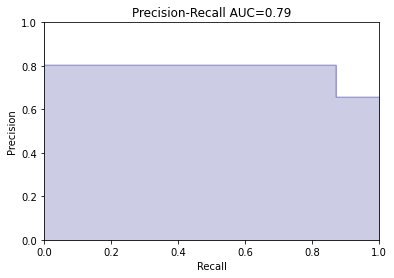

In [89]:
# Plotting the precision-recall curve 

precision, recall, threshold = metrics.precision_recall_curve(white_y_test, gridWhiteClf_y_pred)

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='navy', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
x = plt.xlabel('Recall')
y = plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall AUC={0:0.2f}'.format(metrics.average_precision_score(white_y_test, gridWhiteClf_y_pred)))

In [90]:
# determine the average precision score
print("average_precision_score:",metrics.average_precision_score(white_y_test, gridWhiteClf_y_pred))

average_precision_score: 0.7860592093279136


In [91]:
# determine f1_score
print("f1_score:",metrics.f1_score(white_y_test, gridWhiteClf_y_pred))

f1_score: 0.8376383763837638


In [92]:
# determine the roc_auc_score
print("roc_auc_score:",metrics.roc_auc_score(white_y_test, gridWhiteClf_y_pred))

roc_auc_score: 0.7348269700959187


In [93]:
# To calculate the probability 
prob_white = gridWhiteClf.predict_proba(white_X_test)
prob_white

array([[0.81340513, 0.18659487],
       [0.89118291, 0.10881709],
       [0.09891082, 0.90108918],
       ...,
       [0.48008644, 0.51991356],
       [0.58983894, 0.41016106],
       [0.84212414, 0.15787586]])

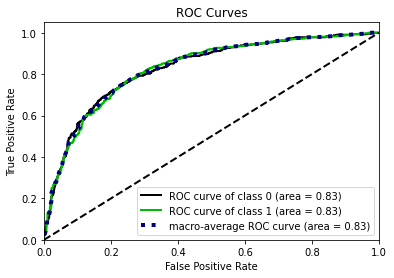

In [94]:
# Plotting the ROC curve
import scikitplot as skplt
skplt.metrics.plot_roc(white_y_test, prob_white, plot_micro=False)
plt.show()

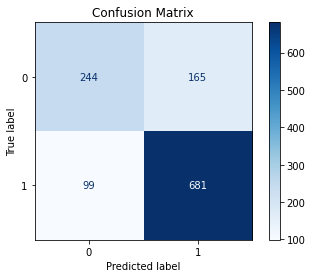

In [95]:
# plotting the confusion matrix
metrics.plot_confusion_matrix(gridWhiteClf, white_X_test, white_y_test, cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.show() 

In [96]:
# determine the classifcation report.
print("classification_report:\n",metrics.classification_report(white_y_test, gridWhiteClf_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65       409
           1       0.80      0.87      0.84       780

    accuracy                           0.78      1189
   macro avg       0.76      0.73      0.74      1189
weighted avg       0.77      0.78      0.77      1189



### Classification model for Red wine 

In [135]:
from sklearn.svm import SVC  
svclassifier_red = SVC()

svclassifier_red.fit(red_X_train, red_y_train)
redClf_y_pred = svclassifier_red.predict(red_X_test)
print("SVM - linear:")

# model accuracy
print("Accuracy :",metrics.accuracy_score(red_y_test,redClf_y_pred) * 100, "% \n")

# Evaluate our model 
print(metrics.classification_report(red_y_test, redClf_y_pred))

SVM - linear:
Accuracy : 70.34313725490196 % 

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       189
           1       0.75      0.67      0.71       219

    accuracy                           0.70       408
   macro avg       0.71      0.71      0.70       408
weighted avg       0.71      0.70      0.70       408



In [136]:
# get the parameter detials
svclassifier_red.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

We got the highest 70.34 accuracy . Now let's try hypeer parameters tuning to check if the accuracy increase after fine tuning. And Here is when the usefulness of GridSearch comes into picture. We can search for parameters using a GridSearch!

### Hyper-parameters optimization for Red wine

In [100]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf', 'linear']}

gridRedClf =  GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
  
# fitting the model for grid search
gridRedClf.fit(red_X_train, red_y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.4s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ...................

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [101]:
# best estimator after tuning
print(gridRedClf.best_estimator_)

SVC(C=1, gamma=0.1, probability=True)


In [102]:
# best parameter after tuning
print(gridRedClf.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [103]:
# Model prediction on test data after fine tuning
gridRedClf_y_pred = gridRedClf.predict(red_X_test)
gridRedClf_y_pred[:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [104]:
# Model Accuracy
print("Accuracy after fine tuning :",metrics.accuracy_score(red_y_test,gridRedClf_y_pred) * 100, "% \n")

Accuracy after fine tuning : 70.58823529411765 % 



### Evaluation metric for red wine classification 

In [105]:
# determine recall score 
print("recall_score:",metrics.recall_score(red_y_test, gridRedClf_y_pred))

recall_score: 0.6712328767123288


Text(0.5, 1.0, 'Precision-Recall AUC=0.68')

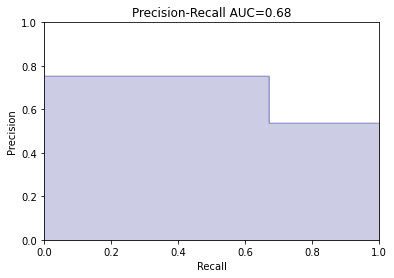

In [106]:
# Plotting the precision-recall curve 

precision, recall, threshold = metrics.precision_recall_curve(red_y_test, gridRedClf_y_pred)

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='navy', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
x = plt.xlabel('Recall')
y = plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall AUC={0:0.2f}'.format(metrics.average_precision_score(red_y_test, gridRedClf_y_pred)))

In [107]:
# determine the average precision score
print("average_precision_score:",metrics.average_precision_score(red_y_test, gridRedClf_y_pred))

average_precision_score: 0.6824769106799726


In [108]:
# determine f1_score
print("f1_score:",metrics.f1_score(red_y_test, gridRedClf_y_pred))

f1_score: 0.7101449275362318


In [109]:
# determine the roc_auc_score
print("roc_auc_score:",metrics.roc_auc_score(red_y_test, gridRedClf_y_pred))

roc_auc_score: 0.7086323113720374


In [110]:
# To calculate the probability 
prob_red = gridRedClf.predict_proba(red_X_test)
prob_red[:10]

array([[0.14247227, 0.85752773],
       [0.82597246, 0.17402754],
       [0.04139665, 0.95860335],
       [0.08654946, 0.91345054],
       [0.58317722, 0.41682278],
       [0.13384039, 0.86615961],
       [0.19482638, 0.80517362],
       [0.02419428, 0.97580572],
       [0.07752513, 0.92247487],
       [0.03495233, 0.96504767]])

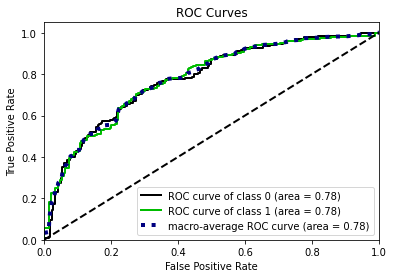

In [111]:
# Plotting the ROC curve
import scikitplot as skplt
skplt.metrics.plot_roc(red_y_test, prob_red, plot_micro=False)
plt.show()

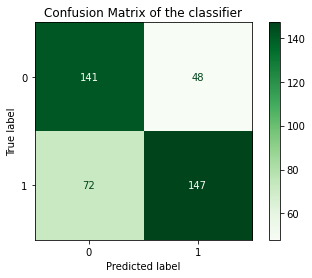

In [112]:
# plotting the confusion matrix
metrics.plot_confusion_matrix(gridRedClf, red_X_test, red_y_test, cmap=plt.cm.Greens) 
plt.title('Confusion Matrix of the classifier')
plt.show() 

In [113]:
# determine the classifcation report.
print("classification_report:\n",metrics.classification_report(red_y_test, gridRedClf_y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       189
           1       0.75      0.67      0.71       219

    accuracy                           0.71       408
   macro avg       0.71      0.71      0.71       408
weighted avg       0.71      0.71      0.71       408



### Regression model for white wine 

In [144]:
# importing libraries for regression
from sklearn import svm

In [145]:
# fitting the model

svregressor_white = svm.SVR()
svregressor_white.fit(white_X_train, white_y_train)

SVR()

In [146]:
# Predict the response for test dataset
whiteRegr_y_pred = svregressor_white.predict(white_X_test)
whiteRegr_y_pred

array([ 0.05202937, -0.10390521,  1.042703  , ...,  0.5254568 ,
        0.33166336,  0.07007267])

In [147]:
# get the parameter detials
svregressor_white.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Fine tuning with GridSearchCV for white wine

In [139]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('rbf', 'poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
gridWhiteRegr = GridSearchCV(svr, parameters)
gridWhiteRegr.fit(white_X_train,white_y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001], 'kernel': ('rbf', 'poly')})

In [140]:
# Model prediction on test data after fine tuning
gridWhiteRegr_y_pred = gridWhiteRegr.predict(white_X_test)
gridWhiteRegr_y_pred

array([0.54835446, 0.4633686 , 0.75036675, ..., 0.49738222, 0.55023791,
       0.41758487])

In [141]:
# print best parameter after tuning
gridWhiteRegr.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [142]:
# Selecting the best estimator
gridWhiteRegr.best_estimator_

SVR(C=10, epsilon=0.3, gamma=0.0001)

### Evaluation metric for white wine regression

In [143]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Check the r2-score value.
print('\033[1m'+"The R2_Score:"+'\033[0m',metrics.r2_score(white_y_test, gridWhiteRegr_y_pred))
# determine MAE score
print('\033[1m'+"Mean Absolute Error:"+'\033[0m',metrics.mean_absolute_error(white_y_test, gridWhiteRegr_y_pred))
# determine MSE score
print('\033[1m'+"The Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(white_y_test, gridWhiteRegr_y_pred, squared=True))
# determine rmse score
print('\033[1m'+"The Root Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(white_y_test, gridWhiteRegr_y_pred, squared=False))


The R2_Score: 0.23793482869937754
Mean Absolute Error: 0.36591197024813565
The Mean Squared Error: 0.17196747515834068
The Root Mean Squared Error: 0.4146896130340627


### Regression model for red-wine

In [126]:
# importing libraries for regression
from sklearn import svm

# fitting the model
svregressor_red = svm.SVR(kernel = 'linear')
svregressor_red .fit(red_X_train, red_y_train)

SVR(kernel='linear')

In [127]:
# Predict the response for test dataset
RedRegr_y_pred = svregressor_red.predict(red_X_test)
RedRegr_y_pred[:10]

array([0.85605711, 0.11290662, 1.28197403, 0.81645441, 0.36972547,
       1.1912193 , 0.46290296, 1.1467841 , 1.10387973, 0.83230776])

### Fine tuning with GridSearchCV for red wine regression

In [128]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('rbf', 'linear'), 'C':[0.1, 1, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
gridRedRegr = GridSearchCV(svr, parameters)
gridRedRegr.fit(red_X_train,red_y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('rbf', 'linear')})

In [129]:
# Model prediction on test data after fine tuning
gridRedRegr_y_pred = gridRedRegr.predict(red_X_test)
gridRedRegr_y_pred[:10]

array([0.80239426, 0.21394838, 1.1057617 , 0.76648221, 0.4269613 ,
       1.05404034, 0.52245884, 1.02805526, 1.02592806, 0.80154314])

In [130]:
# print best parameter after tuning
gridRedRegr.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 0.0001, 'kernel': 'rbf'}

In [131]:
# Selecting the best estimator
gridRedRegr.best_estimator_

SVR(C=10, epsilon=0.2, gamma=0.0001)

### Evaluation metric for red wine regression

In [132]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Check the r2-score value.
print('\033[1m'+"The R2_Score:"+'\033[0m',metrics.r2_score(red_y_test, gridRedRegr_y_pred))
# determine MAE score
print('\033[1m'+"Mean Absolute Error:"+'\033[0m',metrics.mean_absolute_error(red_y_test, gridRedRegr_y_pred))
# determine MSE score
print('\033[1m'+"The Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(red_y_test, gridRedRegr_y_pred, squared=True))
# determine rmse score
print('\033[1m'+"The Root Mean Squared Error:"+'\033[0m',metrics.mean_squared_error(red_y_test, gridRedRegr_y_pred, squared=False))

The R2_Score: 0.21319515268353784
Mean Absolute Error: 0.38383929037473763
The Mean Squared Error: 0.19563773209388025
The Root Mean Squared Error: 0.44230954329957684
